# Project 2: Linear Classification

### Part 1: Generate Training and Testing Data (2 points)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sys import exit
import math

plt.close()

#-----------Part 1----------------

# Generating Training and Testing Data
# Creating a class for the dataset
class Data_set:
    def __init__(self, mean, cov):
        self.mean = mean
        self.cov  = cov
    
    def split_data(self):
        np.random.shuffle(self.data)
        self.train = self.data[:len(self.data)//2]
        self.test  = self.data[len(self.data)//2:]
        
        return self
    
    def multivariate_normal(self, num):
        # asself.data.shape = num *  2
        self.data = np.random.multivariate_normal(self.mean,self.cov,size=num)
    
        return self
    
# def lda_accuracy(data, w, b):
#     false_count = 0
#     miss_data    = []
#     for index, item in enumerate(data):
#         lda_val = np.dot(w,item)
#         # class c1
#         if index<100 and lda_val<0:
#             false_count = false_count + 1
#             miss_data   = np.append(miss_data, item)
#         # class c2    
#         elif index>=100 and lda_val>=0:
#             false_count = false_count + 1
#             miss_data   = np.append(miss_data, item)
    
#     accuracy = 1 - false_count/len(data)
#     miss_data = miss_data.reshape(int(len(miss_data)/2),2)
# #     print(miss_data.shape)
    
#     return accuracy, miss_data
    
def accuracy(c1, c2, w, b, var):
    # Calculating accuracy of learned model
    # Using generated data
    acc_c1 = []
    acc_c2 = []
    miss = []
    
    for item in c1:
        bool_c1 = point_loc(item, c1, w, b, var)
        acc_c1.append(bool_c1)
        if not bool_c1:
            miss = np.append(miss, item)
    
    for item in c2:
        bool_c2 = point_loc(item, c2, w, b, var)
        acc_c2.append(bool_c2)
        if bool_c2:
            miss = np.append(miss, item)
        
    acc = (sum(acc_c1)+(100-sum(acc_c2)))/200
    miss = miss.reshape(len(miss)//2, 2)
        
    return acc, miss
    
def gen_line_vec(data_set, w, b, var):
    # This function is for generating decision boundary
    
    # var = W.dot(data_set) + b
    # var = 0 when plotting line for LDA
    # var = 0.5 when plotting line for LR
    
    # Find the min and max value on x axis
    mini = min(data_set[:,0])
    maxi = max(data_set[:,0])
    
    # generating x axis vector (step size 0.1)
    x_vec = np.arange(mini, maxi, 0.1)
    
    # calculating y vector
    y_vec = (-var-b-w[0]*x_vec)/w[1]
    
    return x_vec, y_vec

def point_loc(point, data, w, b, var):
    # var = W.dot(data_set) + b
    # var = 0 when plotting line for LDA
    # var = 0.5 when plotting line for LR
    
    _x, _y = gen_line_vec(data, w, b, var)
    point_a = np.array([_x[0],_y[0]])
    point_b = np.array([_x[-1],_y[-1]])
    
    cross_prod = np.cross(point-point_a, point_b-point_a)
    
    result = (cross_prod < 0) # less than 0 when a point is above the divider
    
    return result
  

In [2]:
#### Given parameters
mean1 = np.array([1,1])
mean2 = np.array([-1,-1])
cov1 = np.array([[3,2],[2,3]])
cov2 = np.array([[2,-1],[-1,2]])

#### Generating dataset and spliting dataset
c1 = Data_set(mean1,cov1)
c1 = c1.multivariate_normal(200)
c1 = c1.split_data()
# c1.train, c1.test
c2 = Data_set(mean2,cov2)
c2 = c2.multivariate_normal(200)
c2 = c2.split_data()


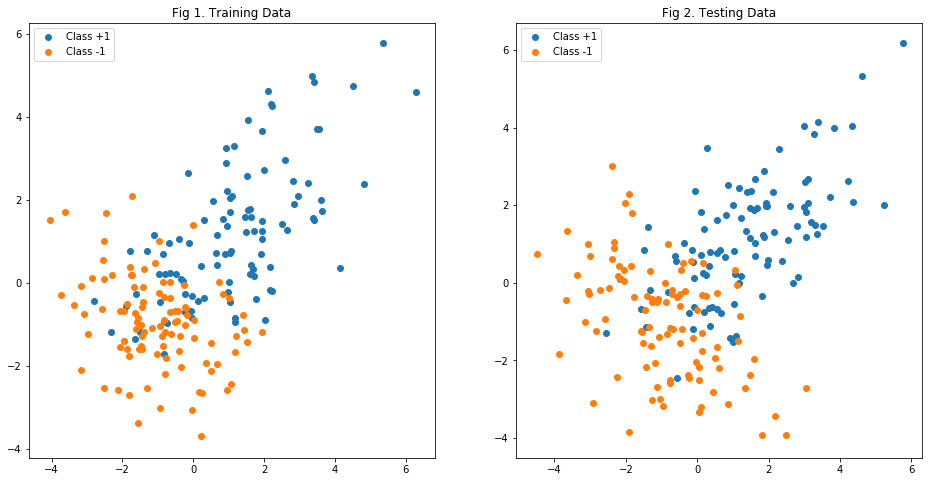

In [3]:
#---PLOT---
fig = plt.figure(1, figsize=(16,8))
fig.clf()
ax_train = fig.add_subplot(121)
ax_train.scatter(c1.train[:,0], c1.train[:,1], label="Class +1")
ax_train.scatter(c2.train[:,0], c2.train[:,1], label="Class -1")
ax_train.legend()
ax_train.set_title("Fig 1. Training Data")

ax_test  = fig.add_subplot(122)
ax_test.scatter(c1.test[:,0], c1.test[:,1], label="Class +1")
ax_test.scatter(c2.test[:,0], c2.test[:,1], label="Class -1")
ax_test.legend()
ax_test.set_title("Fig 2. Testing Data")
plt.show()

### Part 2: Linear Discriminant Analysis (5 points)

In [4]:
#-------------Part 2----------------

# Overall mean & covariance
train_data = np.vstack((c1.train, c2.train))
test_data  = np.vstack((c1.test, c2.test))
# mu_est     = [np.mean(train_data[:,0]),np.mean(train_data[:,1])]
cov_est    = np.cov(test_data.T)   # Transopose data to get correct covariance


In [5]:
# Finding weight(w) vector
# w = (mu1 - mu2)*cov_est^T
sample_mean_c1 = np.array([np.mean(c1.train[:,0]),np.mean(c1.train[:,1])])
sample_mean_c2 = np.array([np.mean(c2.train[:,0]),np.mean(c2.train[:,1])])
w              = np.dot((sample_mean_c1 - sample_mean_c2),cov_est**-1)

pi_1           = len(c1.test)/len(test_data)
pi_2           = len(c2.test)/len(test_data)
# First two terms of bias
term1          = 0.5*np.dot(np.dot(sample_mean_c1.T, np.linalg.inv(cov_est)),sample_mean_c1)
term2          = 0.5*np.dot(np.dot(sample_mean_c2.T, np.linalg.inv(cov_est)),sample_mean_c2)

b              = term1 - term2 + np.log(pi_2/pi_1)

-----LDA-----
The estimate overall covariance is [[3.77202062 1.53183828]
 [1.53183828 3.35306264]]
Learned weight w is [1.97497294 2.0687816 ]
Learned bias b is 0.07966945893158586
The accuracy is 0.835


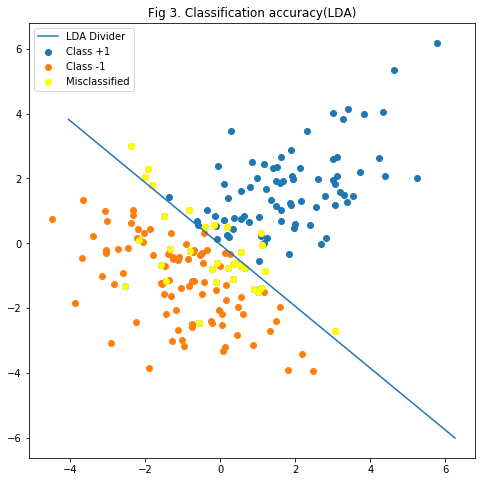

In [6]:
# Classify the test data
x_axis, y_axis = gen_line_vec(train_data, w, b, 0)

acc, miss = accuracy(c1.test, c2.test, w, b, 0)

print("-----LDA-----")
# print("The estimate overall mean is", mu_est)
print("The estimate overall covariance is", cov_est)

print("Learned weight w is", w)
print("Learned bias b is", b)

print("The accuracy is", acc)

#---PLOT---
fig2 = plt.figure(2,figsize=(8,8))
fig2.clf()
ax2  = fig2.add_subplot(111)
ax2.scatter(c1.test[:,0], c1.test[:,1], label="Class +1")
ax2.scatter(c2.test[:,0], c2.test[:,1], label="Class -1")
ax2.scatter(miss[:,0], miss[:,1], label="Misclassified",c="yellow")
ax2.plot(x_axis,y_axis,label="LDA Divider")
ax2.legend()
ax2.set_title("Fig 3. Classification accuracy(LDA)")
plt.show()

### Part 3: Logistic Regression (10 points)

In [7]:
#-------------Part 3----------------

# Lump a '1' into each data point
ones          = np.ones(len(train_data))[None].T
train_data_1s = np.hstack((ones, train_data))

In [32]:
def IRLS(data):
    length        = len(data)
    not_converged = True
    w             = np.array([0, 0, 0])
    p             = np.empty(length)
    s             = np.empty(length)
    z             = np.empty(length)

    ones          = np.ones(200)
    ones[100:]    = ones[100:]*-1
    
    temp_var      = np.hstack((ones[None].T,data))
    np.random.shuffle(temp_var)
    
    y             = temp_var[:,0]
    data          = temp_var[:,1:]
    print(data.shape)
    
    while not_converged:
        w_prev = w
        for i in range(length):
            p[i] = np.exp(w_prev.dot(data[i])) / (1 + np.exp(w_prev.dot(data[i])))
            s[i] = p[i]*(1-p[i])
            
            if math.isnan(s[i]): s[i]=1
            
            z[i] = w_prev.dot(data[i]) + (y[i]-p[i])/(max(s[i],0.00001))
            
        diag_s = np.diag(s)
#         print('diag:', diag_s.shape)
        t1     = np.linalg.inv(np.dot(np.dot(data.T, diag_s), data))
        t2     = np.dot(np.dot(data.T, diag_s), z)
        w      = np.dot(t1, t2)
#         print("t1, t2",t1.shape, t2.shape)
        w      = w/np.linalg.norm(w)
        
        print('Iterations',w)
        
        if abs(sum(w-w_prev)) < 0.000001:
            
            print("Converged!!")
            not_converged = False
            return w
            
        elif sum(abs(w)) > 900 or math.isnan(w[0]):
            
            print("Not converging!!!")
            return w
            
    return w

(200, 3)
Iterations [-0.87453798  0.31455678  0.36910345]
Iterations [-0.85520305  0.33744901  0.39339028]
Iterations [-0.84702593  0.3448909   0.40447168]
Iterations [-0.84354702  0.34712642  0.40979468]
Iterations [-0.84204655  0.34765753  0.41242193]
Iterations [-0.84138798  0.34768459  0.41374109]
Iterations [-0.84109323  0.34759935  0.41441147]
Iterations [-0.84095858  0.34751515  0.41475521]
Iterations [-0.84089579  0.34745526  0.41493266]
Iterations [-0.84086593  0.34741756  0.41502474]
Iterations [-0.84085146  0.34739525  0.41507271]
Iterations [-0.84084434  0.34738254  0.41509778]
Iterations [-0.84084079  0.34737545  0.41511091]
Iterations [-0.84083899  0.34737157  0.41511779]
Iterations [-0.84083808  0.34736946  0.41512141]
Iterations [-0.84083761  0.34736833  0.41512332]
Iterations [-0.84083736  0.34736772  0.41512432]
Converged!!
-----LR-----
Bias: -0.840837361742676
Weight: [0.34736772 0.41512432]
Accuracy 0.825


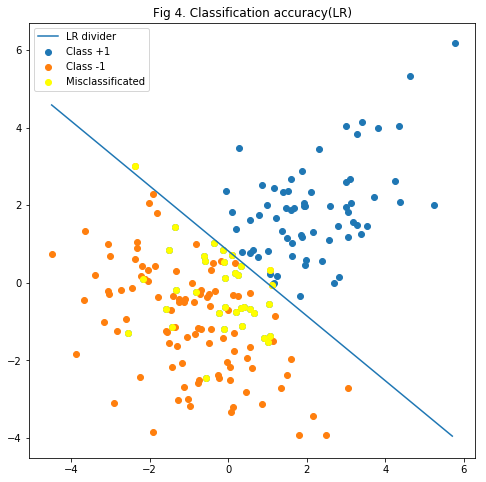

In [33]:
# train_data_1s.T.shape
#print("-----LDA-----")
#print("Bias:",b,"W:",w)
re = IRLS(train_data_1s)
print("-----LR-----")
print("Bias:",re[0])
print("Weight:",re[1:])
acc, miss = accuracy(c1.test, c2.test, re[1:], re[0 ], 0.5)
print("Accuracy", acc)

#---PLOT---
_x,_y = gen_line_vec(test_data, re[1:], re[0], 0.5)
f4 = plt.figure(4,figsize=(8,8))
f4.clf()
ax4 = f4.add_subplot(111)
ax4.scatter(c1.test[:,0], c1.test[:,1], label="Class +1")
ax4.scatter(c2.test[:,0], c2.test[:,1], label="Class -1")
ax4.scatter(miss[:,0],miss[:,1], label="Misclassificated", c="yellow")
ax4.plot(_x, _y, label='LR divider')
ax4.legend()
ax4.set_title("Fig 4. Classification accuracy(LR)")
plt.show()

# exit()

# Quadratic Discriminant Analysis (+3 points)

In [10]:
sample_mean_c1, sample_mean_c2
pi_1, pi_2
sample_cov_c1 = np.cov(c1.train.T)
sample_cov_c2 = np.cov(c2.train.T)

In [11]:
def qda(data):
    term1 = 0.5*np.dot((data-sample_mean_c1).T, np.linalg.inv(sample_cov_c1)).dot(data-sample_mean_c1)
    term2 = 0.5*np.dot((data-sample_mean_c2).T, np.linalg.inv(sample_cov_c2)).dot(data-sample_mean_c2)
    term3 = 0.5*(np.log(np.linalg.norm(sample_cov_c1)))
    term4 = 0.5*(np.log(np.linalg.norm(sample_cov_c2)))
    term5 = np.log(pi_2/pi_1)
    
    result = term1 - term2 + term3 - term4 + term5
    
    return result

In [12]:
def qda_accracy():
    c1_result = [] 
    c2_result = []
    miss = []
    
    for i in c1.test:
        c1_result.append(qda(i)<0)
        if qda(i)>0:
            miss.append(i)
    
    for i in c2.test:
        c2_result.append(qda(i)>0)
        if qda(i)<0:
            miss.append(i)
    
    miss = np.array(miss)
    acc = (sum(c1_result) + sum(c2_result))/200
    
    return acc, miss

In [13]:
qda_acc, qda_miss = qda_accracy()

In [14]:
min_x = min(test_data[:,0])
min_y = min(test_data[:,1])
max_x = max(test_data[:,0])
max_y = max(test_data[:,1])
x_ax = np.linspace(min_x, max_x, 1000)
y_ax = np.linspace(min_y, max_y, 300)

In [15]:
array = []
for i in x_ax:
    for j in y_ax:
        result = qda([i, j])
        if abs(result - 0) < 0.01:
            array.append([i,j])
#             print(result)

array = np.array(array)
a1 = array[:,0]
a2 = array[:,1]


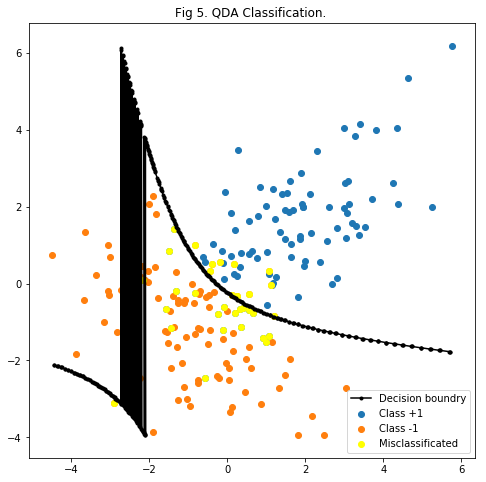

In [16]:
f5 = plt.figure(5,figsize=(8,8))
f5.clf()
ax5 = f5.add_subplot(111)
ax5.plot(a1, a2, marker=".", label='Decision boundry', c="black")
ax5.scatter(c1.test[:,0], c1.test[:,1], label="Class +1")
ax5.scatter(c2.test[:,0], c2.test[:,1], label="Class -1")
ax5.scatter(qda_miss[:,0],qda_miss[:,1], label="Misclassificated", c="yellow")

ax5.legend()
ax5.set_title("Fig 5. QDA Classification. ")
plt.show()

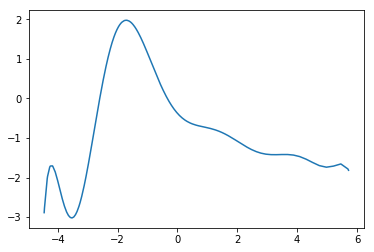

In [17]:
plt.plot(np.unique(a1), np.poly1d(np.polyfit(a1, a2, 10))(np.unique(a1)))

In [18]:
a2.shape

(375,)

In [19]:
print("-----QDA-----")
print("The accuracy of QDA is", qda_acc)

-----QDA-----
The accuracy of QDA is 0.835
